In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
london_boroughs_gss_codes = {
    "Barking and Dagenham": "E09000002",
    "Barnet": "E09000003",
    "Bexley": "E09000004",
    "Brent": "E09000005",
    "Bromley": "E09000006",
    "Camden": "E09000007",
    "Croydon": "E09000008",
    "Ealing": "E09000009",
    "Enfield": "E09000010",
    "Greenwich": "E09000011",
    "Hackney": "E09000012",
    "Hammersmith and Fulham": "E09000013",
    "Haringey": "E09000014",
    "Harrow": "E09000015",
    "Havering": "E09000016",
    "Hillingdon": "E09000017",
    "Hounslow": "E09000018",
    "Islington": "E09000019",
    "Kensington and Chelsea": "E09000020",
    "Kingston upon Thames": "E09000021",
    "Lambeth": "E09000022",
    "Lewisham": "E09000023",
    "Merton": "E09000024",
    "Newham": "E09000025",
    "Redbridge": "E09000026",
    "Richmond upon Thames": "E09000027",
    "Southwark": "E09000028",
    "Sutton": "E09000029",
    "Tower Hamlets": "E09000030",
    "Waltham Forest": "E09000031",
    "Wandsworth": "E09000032",
    "Westminster": "E09000033"
}

london_borough_gss_codes = set(london_boroughs_gss_codes.values())

In [3]:
imd_path = 'indices_deprivation_local_authority.csv'
imd_df = pd.read_csv(imd_path, sep=',')

In [4]:
imd_df.head(5)

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
0,E06000021,2019,Average Score,NaN,34.504,a. Index of Multiple Deprivation (IMD)
1,E06000021,2019,Local concentration,NaN,32056.840,a. Index of Multiple Deprivation (IMD)
2,E06000021,2019,Rank of local concentration,NaN,35.000,a. Index of Multiple Deprivation (IMD)
3,E06000021,2015,Local concentration,NaN,32240.000,a. Index of Multiple Deprivation (IMD)
4,E06000021,2019,Rank of average rank,NaN,15.000,a. Index of Multiple Deprivation (IMD)


In [5]:
education_df = imd_df[(imd_df['Indices of Deprivation'] == 'd. Education, Skills and Training Domain') & (imd_df['Measurement']== 'Average Score')]
print(education_df['Measurement'].unique())


['Average Score']


In [6]:
education_df

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
37,E06000021,2019,Average Score,NaN,38.935,"d. Education, Skills and Training Domain"
113,E07000198,2019,Average Score,NaN,18.228,"d. Education, Skills and Training Domain"
189,E07000193,2019,Average Score,NaN,22.829,"d. Education, Skills and Training Domain"
265,E07000197,2019,Average Score,NaN,13.947,"d. Education, Skills and Training Domain"
341,E07000035,2019,Average Score,NaN,12.391,"d. Education, Skills and Training Domain"
...,...,...,...,...,...,...
23749,E06000059,2019,Average Score,NaN,18.456,"d. Education, Skills and Training Domain"
23825,E06000058,2019,Average Score,NaN,19.384,"d. Education, Skills and Training Domain"
23901,E07000246,2019,Average Score,NaN,18.929,"d. Education, Skills and Training Domain"
23977,E07000244,2019,Average Score,NaN,24.332,"d. Education, Skills and Training Domain"


In [7]:
value_to_check = 'E09000021'
is_present = value_to_check in education_df['FeatureCode'].values
is_present

True

In [8]:
education_df = education_df[education_df['FeatureCode'].isin(london_borough_gss_codes)]

In [9]:
education_df

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
721,E09000021,2019,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
797,E09000027,2019,Average Score,NaN,3.534,"d. Education, Skills and Training Domain"
1405,E09000029,2019,Average Score,NaN,11.953,"d. Education, Skills and Training Domain"
1557,E09000024,2019,Average Score,NaN,9.184,"d. Education, Skills and Training Domain"
2849,E09000005,2019,Average Score,NaN,15.223,"d. Education, Skills and Training Domain"
2925,E09000009,2019,Average Score,NaN,12.546,"d. Education, Skills and Training Domain"
3001,E09000015,2019,Average Score,NaN,8.044,"d. Education, Skills and Training Domain"
3077,E09000017,2019,Average Score,NaN,16.402,"d. Education, Skills and Training Domain"
3305,E09000003,2019,Average Score,NaN,7.830,"d. Education, Skills and Training Domain"
3837,E09000019,2019,Average Score,NaN,12.483,"d. Education, Skills and Training Domain"


In [10]:
# Load the shapefile 
shapefile_path = "london_ward/London_Ward.shp" 
gdf = gpd.read_file(shapefile_path, )


In [11]:
print(gdf.columns)
gdf

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry'],
      dtype='object')


,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."
...,...,...,...,...,...,...,...
652,Aldgate,E05009289,City and County of the City of London,E09000001,11.230,0.0,"POLYGON ((533315.597 180988.802, 533305.703 18..."
653,Broad Street,E05009295,City and County of the City of London,E09000001,8.157,0.0,"POLYGON ((533005.698 181612.203, 533099.098 18..."
654,Coleman Street,E05009299,City and County of the City of London,E09000001,15.061,0.0,"POLYGON ((532552.797 181289.396, 532554.198 18..."
655,Portsoken,E05009308,City and County of the City of London,E09000001,6.288,0.0,"POLYGON ((533814.299 180968.898, 533757.202 18..."


In [12]:
merged_df = gdf.merge(education_df, left_on="LAGSSCODE", right_on="FeatureCode", how="left")


In [13]:
merged_df

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",E09000021,2019.0,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",E09000021,2019.0,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",E09000021,2019.0,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16...",E09000021,2019.0,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16...",E09000021,2019.0,Average Score,NaN,6.938,"d. Education, Skills and Training Domain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Aldgate,E05009289,City and County of the City of London,E09000001,11.230,0.0,"POLYGON ((533315.597 180988.802, 533305.703 18...",NaN,NaN,NaN,NaN,NaN,NaN
653,Broad Street,E05009295,City and County of the City of London,E09000001,8.157,0.0,"POLYGON ((533005.698 181612.203, 533099.098 18...",NaN,NaN,NaN,NaN,NaN,NaN
654,Coleman Street,E05009299,City and County of the City of London,E09000001,15.061,0.0,"POLYGON ((532552.797 181289.396, 532554.198 18...",NaN,NaN,NaN,NaN,NaN,NaN
655,Portsoken,E05009308,City and County of the City of London,E09000001,6.288,0.0,"POLYGON ((533814.299 180968.898, 533757.202 18...",NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns_removed = ['GSS_CODE','NAME','NONLD_AREA','DateCode','Units']
merged_df = merged_df.drop(columns = columns_removed)
merged_df= merged_df.drop_duplicates(subset=['DISTRICT'])


In [15]:
merged_df

,DISTRICT,LAGSSCODE,HECTARES,geometry,FeatureCode,Measurement,Value,Indices of Deprivation
0,Kingston upon Thames,E09000021,755.173,"POLYGON ((516401.596 160201.802, 516407.302 16...",E09000021,Average Score,6.938,"d. Education, Skills and Training Domain"
16,Croydon,E09000008,452.138,"POLYGON ((528552.301 159658.098, 528556.003 15...",E09000008,Average Score,15.577,"d. Education, Skills and Training Domain"
44,Bromley,E09000006,2903.960,"POLYGON ((545237.403 156802.195, 545233.701 15...",E09000006,Average Score,10.551,"d. Education, Skills and Training Domain"
66,Hounslow,E09000018,444.841,"POLYGON ((508084.300 172367.100, 507949.897 17...",E09000018,Average Score,13.287,"d. Education, Skills and Training Domain"
86,Ealing,E09000009,379.609,"POLYGON ((512616.701 179800.702, 512619.702 17...",E09000009,Average Score,12.546,"d. Education, Skills and Training Domain"
109,Havering,E09000016,2253.736,"POLYGON ((553840.201 184909.400, 553848.800 18...",E09000016,Average Score,22.594,"d. Education, Skills and Training Domain"
127,Hillingdon,E09000017,2352.117,"POLYGON ((507187.699 174163.695, 507160.804 17...",E09000017,Average Score,16.402,"d. Education, Skills and Training Domain"
149,Harrow,E09000015,157.492,"POLYGON ((512390.901 185765.704, 512428.103 18...",E09000015,Average Score,8.044,"d. Education, Skills and Training Domain"
170,Brent,E09000005,267.991,"POLYGON ((517663.799 186262.102, 517630.498 18...",E09000005,Average Score,15.223,"d. Education, Skills and Training Domain"
191,Barnet,E09000003,455.053,"POLYGON ((520807.600 195272.403, 520824.197 19...",E09000003,Average Score,7.830,"d. Education, Skills and Training Domain"


In [16]:
merged_df = merged_df[merged_df['DISTRICT'] != 'City and County of the City of London']
merged_df

,DISTRICT,LAGSSCODE,HECTARES,geometry,FeatureCode,Measurement,Value,Indices of Deprivation
0,Kingston upon Thames,E09000021,755.173,"POLYGON ((516401.596 160201.802, 516407.302 16...",E09000021,Average Score,6.938,"d. Education, Skills and Training Domain"
16,Croydon,E09000008,452.138,"POLYGON ((528552.301 159658.098, 528556.003 15...",E09000008,Average Score,15.577,"d. Education, Skills and Training Domain"
44,Bromley,E09000006,2903.960,"POLYGON ((545237.403 156802.195, 545233.701 15...",E09000006,Average Score,10.551,"d. Education, Skills and Training Domain"
66,Hounslow,E09000018,444.841,"POLYGON ((508084.300 172367.100, 507949.897 17...",E09000018,Average Score,13.287,"d. Education, Skills and Training Domain"
86,Ealing,E09000009,379.609,"POLYGON ((512616.701 179800.702, 512619.702 17...",E09000009,Average Score,12.546,"d. Education, Skills and Training Domain"
109,Havering,E09000016,2253.736,"POLYGON ((553840.201 184909.400, 553848.800 18...",E09000016,Average Score,22.594,"d. Education, Skills and Training Domain"
127,Hillingdon,E09000017,2352.117,"POLYGON ((507187.699 174163.695, 507160.804 17...",E09000017,Average Score,16.402,"d. Education, Skills and Training Domain"
149,Harrow,E09000015,157.492,"POLYGON ((512390.901 185765.704, 512428.103 18...",E09000015,Average Score,8.044,"d. Education, Skills and Training Domain"
170,Brent,E09000005,267.991,"POLYGON ((517663.799 186262.102, 517630.498 18...",E09000005,Average Score,15.223,"d. Education, Skills and Training Domain"
191,Barnet,E09000003,455.053,"POLYGON ((520807.600 195272.403, 520824.197 19...",E09000003,Average Score,7.830,"d. Education, Skills and Training Domain"


In [17]:
# These are teh columns for clustering
data = merged_df[['DISTRICT', 'Value']]

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Value']])

In [19]:
#store silhouette scores
silhouette_scores = []

min_clusters = 2
max_clusters = 10

In [20]:
# Iterate over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

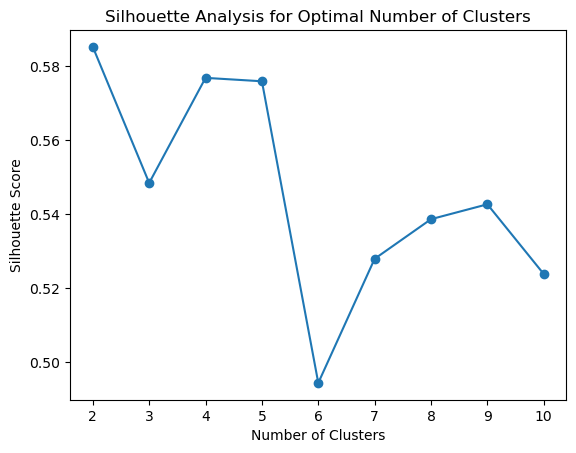

In [21]:
# Plot silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

The optimal number of clusters can be determined based on the highest silhouette score in this case 5

In [22]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(merged_df[['Value']])


C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [23]:
# Add cluster labels to the merged DataFrame
merged_df['Cluster'] = kmeans.labels_

C:\Users\franc\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
for cluster in range(num_clusters):
    districts_in_cluster = merged_df[merged_df['Cluster'] == cluster]['DISTRICT'].tolist()
    print(f"Cluster {cluster + 1}: {districts_in_cluster}")



Cluster 1: ['Croydon', 'Hillingdon', 'Brent', 'Greenwich', 'Bexley', 'Waltham Forest', 'Tower Hamlets', 'Hackney', 'Haringey', 'Newham']
Cluster 2: ['Kingston upon Thames', 'Harrow', 'Barnet', 'Merton', 'Wandsworth', 'Hammersmith and Fulham', 'City of Westminster']
Cluster 3: ['Havering', 'Enfield', 'Barking and Dagenham']
Cluster 4: ['Bromley', 'Hounslow', 'Ealing', 'Lambeth', 'Southwark', 'Lewisham', 'Redbridge', 'Sutton', 'Camden', 'Islington']
Cluster 5: ['Richmond upon Thames', 'Kensington and Chelsea']


In [25]:
clusters = {
    1: ['Bromley', 'Hounslow', 'Ealing', 'Lambeth', 'Southwark', 'Lewisham', 'Redbridge', 'Sutton', 'Camden', 'Islington'],
    2: ['Croydon', 'Hillingdon', 'Brent', 'Greenwich', 'Bexley', 'Waltham Forest', 'Tower Hamlets', 'Hackney', 'Haringey', 'Newham'],
    3: ['Richmond upon Thames', 'Kensington and Chelsea'],
    4: ['Havering', 'Enfield', 'Barking and Dagenham'],
    5: ['Kingston upon Thames', 'Harrow', 'Barnet', 'Merton', 'Wandsworth', 'Hammersmith and Fulham', 'City of Westminster']
}

In [26]:
gdf

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."
...,...,...,...,...,...,...,...
652,Aldgate,E05009289,City and County of the City of London,E09000001,11.230,0.0,"POLYGON ((533315.597 180988.802, 533305.703 18..."
653,Broad Street,E05009295,City and County of the City of London,E09000001,8.157,0.0,"POLYGON ((533005.698 181612.203, 533099.098 18..."
654,Coleman Street,E05009299,City and County of the City of London,E09000001,15.061,0.0,"POLYGON ((532552.797 181289.396, 532554.198 18..."
655,Portsoken,E05009308,City and County of the City of London,E09000001,6.288,0.0,"POLYGON ((533814.299 180968.898, 533757.202 18..."


In [27]:
# Load the shapefile 
shapefile_path = "london_ward/London_Ward.shp" 
gdf = gpd.read_file(shapefile_path)

In [28]:
gdf_dissolved = gdf.dissolve(by='DISTRICT', aggfunc='sum')


In [29]:
cluster_labels_df = pd.DataFrame(columns=['DISTRICT', 'Cluster'])

In [30]:
for cluster, districts in clusters.items():
    temp_df = pd.DataFrame({'DISTRICT': districts, 'Cluster': cluster})
    cluster_labels_df = pd.concat([cluster_labels_df, temp_df], ignore_index=True)

In [31]:
gdf_merged = gdf_dissolved.merge(cluster_labels_df, left_on="DISTRICT", right_on="DISTRICT", how="left")


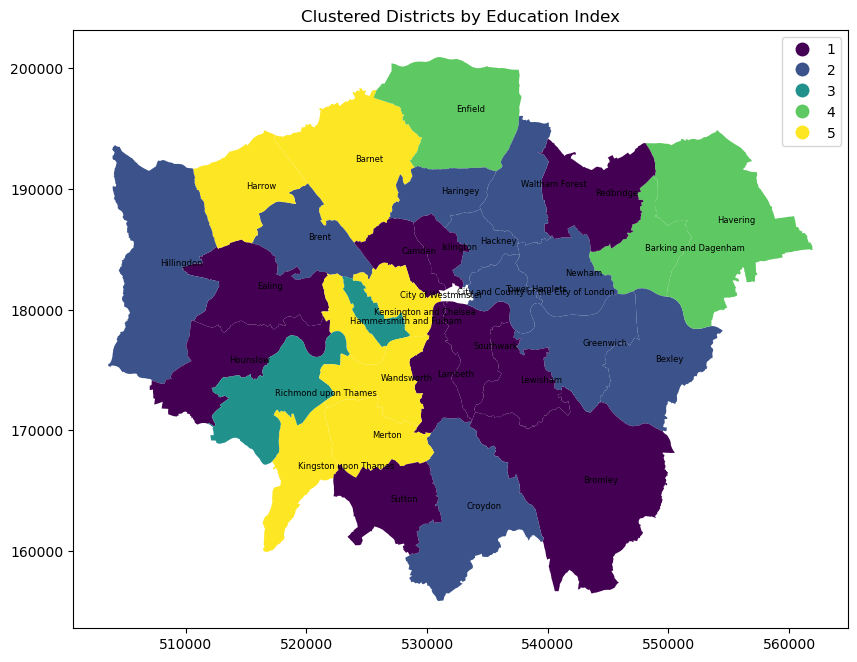

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged.plot(column='Cluster', cmap='viridis', legend=True, ax=ax)

for idx, row in gdf_merged.iterrows():
    district_name = row['DISTRICT']
    centroid = row['geometry'].centroid
    offset_x = centroid.x
    offset_y = centroid.y 
    plt.annotate(text=district_name, xy=(offset_x, offset_y), color='black', fontsize=6)

plt.title("Clustered Districts by Education Index")
plt.show()

In [33]:
#average scores per cluster
average_scores_per_cluster = merged_df.groupby('Cluster')['Value'].mean()


print("Average Scores per Cluster:")
print(average_scores_per_cluster)

Average Scores per Cluster:
Cluster
0    16.542100
1     7.903000
2    22.787333
3    11.795900
4     4.363000
Name: Value, dtype: float64
